<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/multilinearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [80]:
from google.colab import files
raw_data=files.upload()

Saving insurance.csv to insurance (2).csv


In [82]:
df=pd.read_csv("insurance.csv")

In [83]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 1. caluculate the missing value

In [36]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


##EDA

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [39]:
df.iloc[500:510]

,age,sex,bmi,children,smoker,region,charges
500,29,male,34.400,0,yes,southwest,36197.69900
501,43,male,26.030,0,no,northeast,6837.36870
502,51,male,23.210,1,yes,southeast,22218.11490
503,19,male,30.250,0,yes,southeast,32548.34050
504,38,female,28.930,1,no,southeast,5974.38470
505,37,male,30.875,3,no,northwest,6796.86325
506,22,male,31.350,1,no,northwest,2643.26850
507,21,male,23.750,2,no,northwest,3077.09550
508,24,female,25.270,0,no,northeast,3044.21330
509,57,female,28.700,0,no,southwest,11455.28000


In [41]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [85]:
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


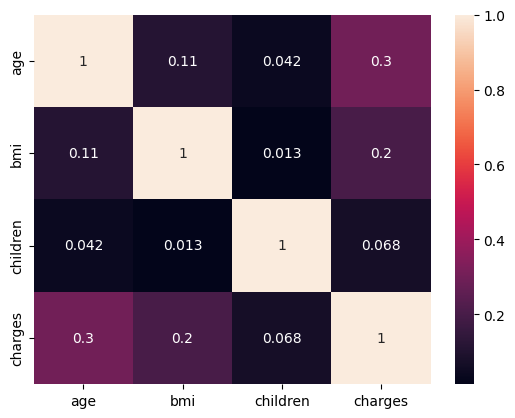

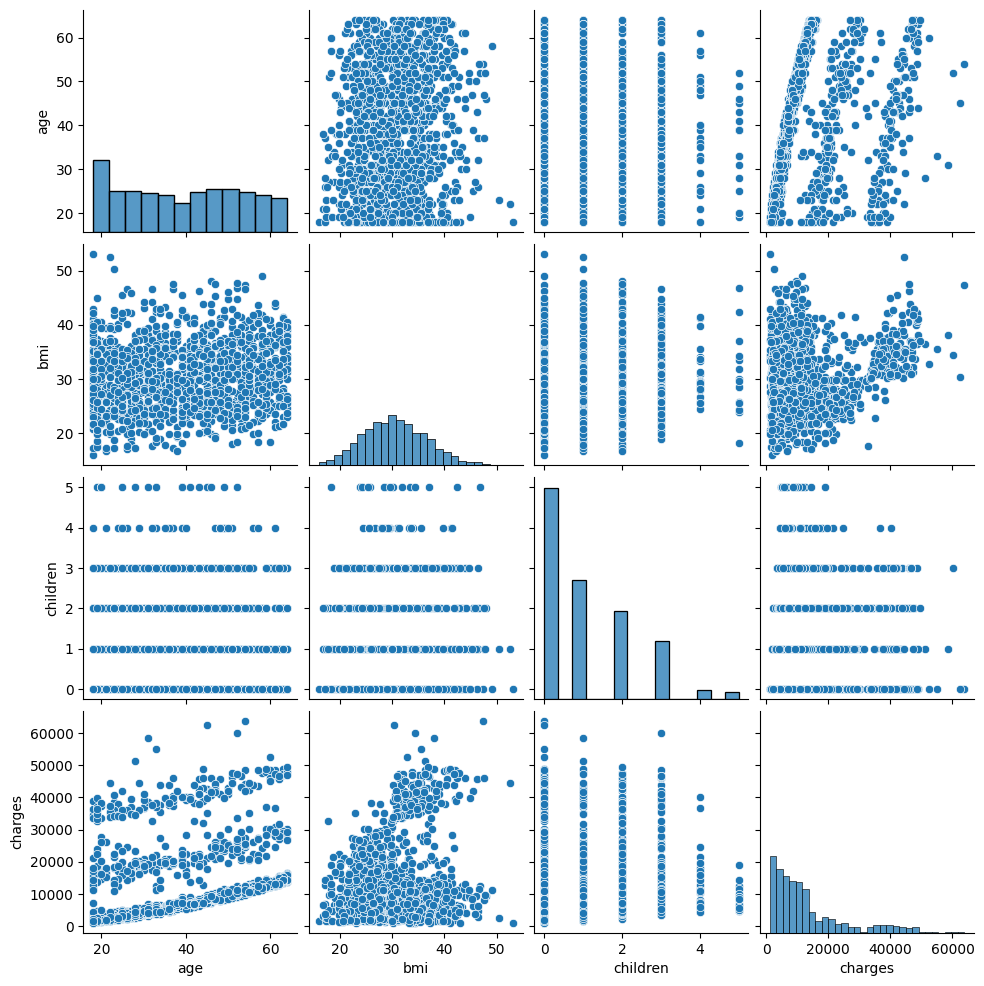

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

# Pairplot to see relationships
sns.pairplot(df)
plt.show()


In [89]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=False)

# Convert all boolean columns to integers (True -> 1, False -> 0)
df_encoded = df_encoded.astype(int)

# Preview the updated dataset
df_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [90]:
# Define features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']


#train and test split- method 1

> Add blockquote



In [142]:
from sklearn.model_selection import train_test_split

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1142)


In [123]:
X_train.shape

(1070, 11)

In [124]:
y_train.shape

(1070,)

In [125]:
from sklearn.linear_model import LinearRegression

In [134]:
model=LinearRegression()

In [143]:
model.fit(X_train,y_train)

LinearRegression()

In [144]:
y_predict=model.predict(X_test)

In [145]:
y_predict

array([   93.66136738, 12669.8716108 , 29332.7560269 ,  9420.74640872,
       12861.16745285, 30711.12491765, 30126.47489145, 28215.32594998,
       33344.56300333,  4543.01231237,  7039.69409714, 12945.4202741 ,
       25952.89082222,  5330.82425863, 10365.94282334, 11601.96441743,
        6375.17982702,  6022.71185224, -1253.2049117 ,  1448.93162202,
       11459.60967719,  4792.92272261,  9209.53669693, 10855.41590676,
       11146.22907459, 26868.4596709 , 14999.29869178,  1920.33927513,
       11748.62151756,  6045.90530522,  4247.90590503, 12093.39533606,
       12669.49687484, 10293.67742939, 40352.50394248,  1690.80824035,
        7709.32784864, 35757.87478396,  5576.96356845,  5858.4853913 ,
       11439.35163526,  6934.45238805,  6783.65855616,  6303.50738149,
       32439.15175278,  3393.19682242, -1993.30274545, 16270.10246502,
        9206.2571137 , 33650.64067569, 11211.66905567,  6362.84824329,
       -1745.36212393, 12314.47071523, 10832.08704655, 10880.56264263,
      

In [146]:
y_test

,charges
943,1628
62,30166
1021,35595
538,8233
287,14256
...,...
776,6986
493,12574
560,9193
425,9788


In [147]:
error=y_predict-y_test

In [141]:
error

,charges
943,-1449.701438
62,-17470.101080
1021,-6170.928480
538,1136.587876
287,-1442.125785
...,...
1167,-285.926764
1019,-20465.364831
619,2901.973128
1147,1428.901364
